In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import kneed
import pingouin as pg
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from scipy import stats 

In [15]:
#df = pd.read_csv(r'C:\Users\js219\Desktop\MRP\Data\Mall_DataBase\Weighted Malls\incomeedu.csv')
#df = pd.read_csv(r'C:\Users\js219\Desktop\MRP\Data\Mall_DataBase\Weighted Malls\vmfloorspace.csv')
#df = pd.read_csv(r'C:\Users\js219\Desktop\MRP\Data\Mall_DataBase\Weighted Malls\compincome.csv')
df = pd.read_csv(r'C:\Users\js219\Desktop\MRP\Data\Mall_DataBase\Weighted Malls\mallrated.csv')


# colNames = list(df.columns)
# colNames
# # # remove_list = ['FID', 'SHOPPING_C','SHOPPING_4','Enclosed','MALL_HIERA','PARKING_SP', 'SC_NAME','LAT','LON', ] #None TA
# # # Normalized no Ethinic Data
remove_list = ['shopping_c','lon','lat']

df_kmeans = df
df_kmeans = df_kmeans.drop(remove_list, axis = 1) 
df_kmeans


,floor_spac,total_stor,total_hh,chil_percent,avg_income,total_exp_food,vm_percent,notvm_percent,lbforce_percent,degree_percent,totalexp,competition
0,0.101604,1.155745,-0.317864,0.745362,-0.002368,-0.325834,-0.187674,-0.274690,-0.216645,-0.901099,-0.295446,-0.211871
1,-0.204051,0.073623,-0.509394,0.506104,-0.158875,-0.490413,-0.203789,0.231073,0.084838,-1.033333,-0.500045,-0.449047
2,-0.427323,-0.401455,-0.618542,-0.027128,-0.385011,-0.583643,-0.326392,0.864945,0.145101,-1.196138,-0.617554,-0.587399
3,-0.424819,-0.322275,-0.604214,-0.058561,-0.444488,-0.576453,-0.255711,0.760565,0.097702,-1.212863,-0.609437,-0.587399
4,0.379819,-0.031950,-0.317864,0.745362,-0.002368,-0.325834,-0.187674,-0.274690,-0.216645,-0.901099,-0.295446,-0.211871
...,...,...,...,...,...,...,...,...,...,...,...,...
869,-0.544657,-0.507028,-0.630677,-0.114969,0.281204,-0.568820,-1.222801,2.527075,1.404649,-1.380678,-0.590435,-0.686223
870,-0.207034,-0.638994,-0.630677,-0.114969,0.281204,-0.568820,-1.222801,2.527075,1.404649,-1.380678,-0.590435,-0.686223
871,-0.209404,0.020837,-0.680684,-0.090266,-0.112573,-0.623945,-1.213504,2.556952,1.534718,-1.549382,-0.662187,-0.725752
872,-0.515869,-0.480635,-0.680684,-0.090266,-0.112573,-0.623945,-1.213504,2.556952,1.534718,-1.549382,-0.662187,-0.725752


In [347]:
#dfkmeans = df_kmeans.apply(stats.zscore)
#dfkmeans.to_csv(r'C:\Users\js219\Desktop\MRP\Data\Mall_DataBase\Weighted Malls\mallrated.csv')


In [312]:
# #Importing the library
# from sklearn import preprocessing
# #Passing the values of the dataset to Min-Max-Scaler
# movies_values = df_kmeans.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(movies_values)

# movies_scaled = pd.DataFrame(x_scaled,columns=df_kmeans.columns)

In [360]:
#Get Cronbach Alpha Score
#pg.cronbach_alpha(data=movies_scaled)
pg.cronbach_alpha(data=df_kmeans)

(0.42003439947762006, array([0.362, 0.475]))

In [23]:
SSE = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,  init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    km = km.fit(df_kmeans)
    SSE.append(km.inertia_)

NameError: name 'KMedoids' is not defined

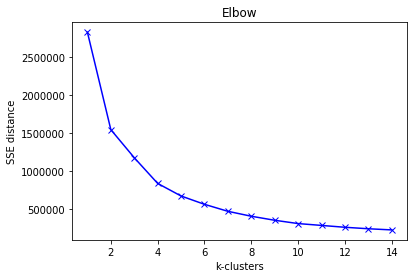

In [362]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('k-clusters')
plt.ylabel('SSE distance')
plt.title('Elbow')
plt.show()

In [18]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, random_state = 0, n_init=10, n_jobs=None, precompute_distances='auto', tol=0.0001, verbose=0)

kfit = kmeans.fit(df_kmeans)
identified_clusters_scaled = kfit.predict(df_kmeans)
labels = kfit.labels_
#Ta Normalized with Clusters
df2 = df[['shopping_c','lon','lat']].copy()
#df2 = df[['SHOPPING_C','LON','LAT']].copy()
clustered_data_scaled = df_kmeans.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
df_final = pd.merge(df2, clustered_data_scaled, left_index=True, right_index=True)
#df_final.to_csv(r'C:\Users\js219\Desktop\MRP\Data\Mall_DataBase\Weighted Malls\mallsfinal.csv', index = False)
x=list(df_final.columns) 
df2= df_final[['floor_spac',
 'total_stor',
 'avg_income',
 'vm_percent',
 'notvm_percent',
 'degree_percent',
 'totalexp',
 'competition','Cluster']]


,shopping_c,lon,lat,floor_spac,total_stor,total_hh,chil_percent,avg_income,total_exp_food,vm_percent,notvm_percent,lbforce_percent,degree_percent,totalexp,competition,Cluster
0,AJM001,-79.022281,43.849150,0.101604,1.155745,-0.317864,0.745362,-0.002368,-0.325834,-0.187674,-0.274690,-0.216645,-0.901099,-0.295446,-0.211871,0
1,AJM003,-79.022350,43.841876,-0.204051,0.073623,-0.509394,0.506104,-0.158875,-0.490413,-0.203789,0.231073,0.084838,-1.033333,-0.500045,-0.449047,0
2,AJM004,-79.016476,43.831474,-0.427323,-0.401455,-0.618542,-0.027128,-0.385011,-0.583643,-0.326392,0.864945,0.145101,-1.196138,-0.617554,-0.587399,0
3,AJM005,-79.033385,43.829640,-0.424819,-0.322275,-0.604214,-0.058561,-0.444488,-0.576453,-0.255711,0.760565,0.097702,-1.212863,-0.609437,-0.587399,0
4,AJM006,-79.020765,43.845250,0.379819,-0.031950,-0.317864,0.745362,-0.002368,-0.325834,-0.187674,-0.274690,-0.216645,-0.901099,-0.295446,-0.211871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,ZOGM003,-80.100722,43.928456,-0.544657,-0.507028,-0.630677,-0.114969,0.281204,-0.568820,-1.222801,2.527075,1.404649,-1.380678,-0.590435,-0.686223,0
870,ZOGM005,-80.091169,43.925909,-0.207034,-0.638994,-0.630677,-0.114969,0.281204,-0.568820,-1.222801,2.527075,1.404649,-1.380678,-0.590435,-0.686223,0
871,ZOGM011,-80.119702,43.902990,-0.209404,0.020837,-0.680684,-0.090266,-0.112573,-0.623945,-1.213504,2.556952,1.534718,-1.549382,-0.662187,-0.725752,0
872,ZOGM014,-80.117101,43.901680,-0.515869,-0.480635,-0.680684,-0.090266,-0.112573,-0.623945,-1.213504,2.556952,1.534718,-1.549382,-0.662187,-0.725752,0


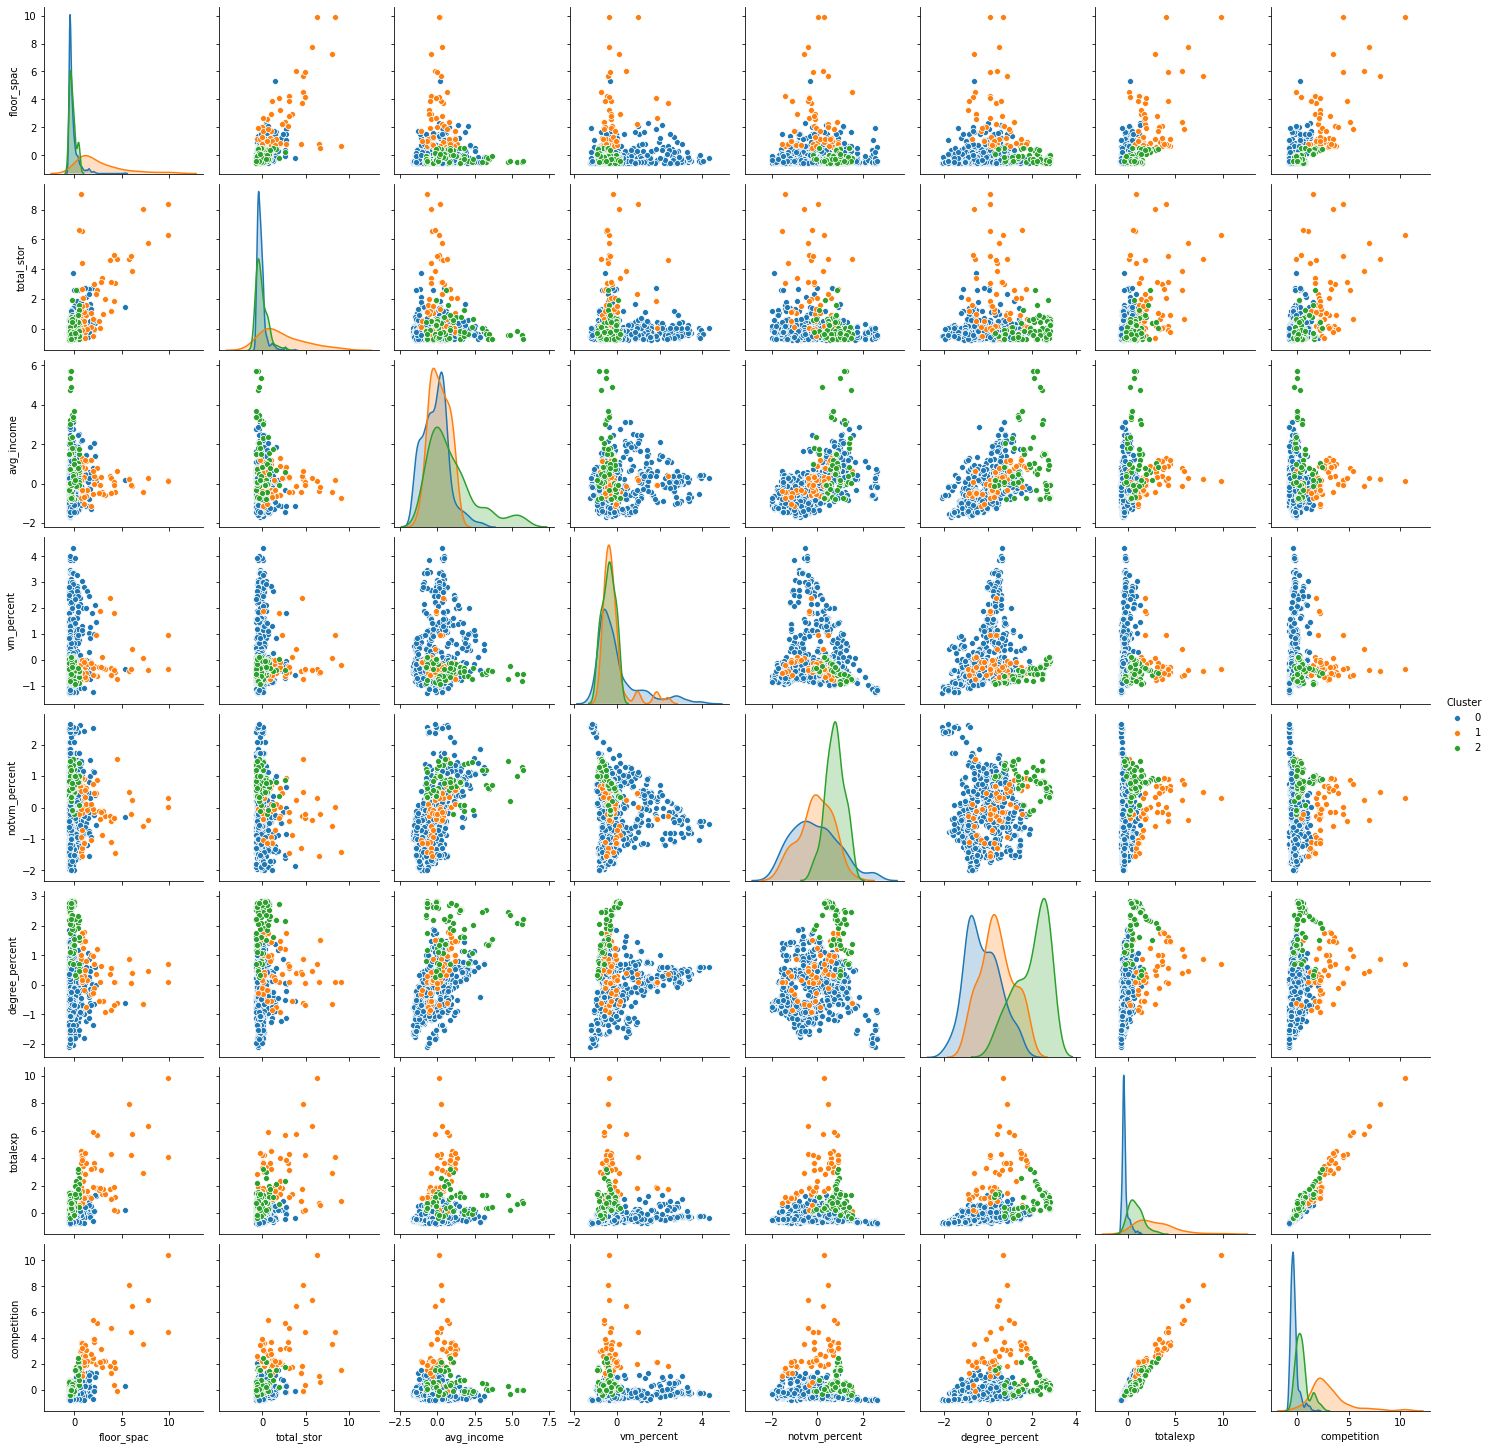

In [12]:
sns_plot = sns.pairplot(df2,hue='Cluster')

plt.show()

In [13]:
# #sns_plot = sns.pairplot(df_final,hue='Cluster')
sns_plot.savefig("C:/Users/js219/Desktop/MRP/Documents/output2.pdf")

In [ ]:
 sns.stripplot(x=df_final['floor_spac'],y=df_final['avg_income'],hue=df_final['Cluster'],jitter=True)

In [22]:
#GET CLUSTER SIZE
df_final.groupby(['Cluster'])[['Cluster']].agg('count')

,Cluster
Cluster,
0,746
1,54
2,74


In [19]:
m = folium.Map(location=[43.788037, -79.330224])
# m.save('index.html')

def color(elev): 
    if elev == 0: 
        col = 'blue'
    elif elev == 1: 
        col = 'orange'
    elif elev == 2: 
        col = 'green'
    elif elev == 3:
        col = 'brown'
    elif elev == 4:
        col = 'pink'
    else: 
        col='red'
    return col 

for la,lo,col_ in zip(df_final['lat'],df_final['lon'],df_final['Cluster']):
    folium.Circle(
        location=[la,lo],
        radius = 5,
        icon=folium.Icon(icon_color='white'),
        color=color(col_)
    ).add_to(m)

# Plotting 
m

In [324]:
#Get Raw scores
